In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# leitura e remoção de valores nulos no campo 'arr_delay'
df = pd.read_parquet("../data/processed/")
df = df.dropna(subset=["arr_delay"])

# seleção de features 
features = ["month", "day", "hour", "sched_dep_time", "sched_arr_time", "origin", "dest", "carrier", "distance", "dep_delay"]

X = df[features]
y = df["arr_delay"]

# one-hot encoding para as variáveis categóricas
X = pd.get_dummies(X, columns=["carrier", "origin", "dest"], drop_first=True)

# split do dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# instanciando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# predições no conjunto de teste
y_pred = model.predict(X_test)

# avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# salvando binário do modelo treinado
joblib.dump(model, "../model/flight_delay_model.joblib")

Mean Squared Error: 310.21855128583826
R^2 Score: 0.8445483829648115


['../model/flight_delay_model.joblib']

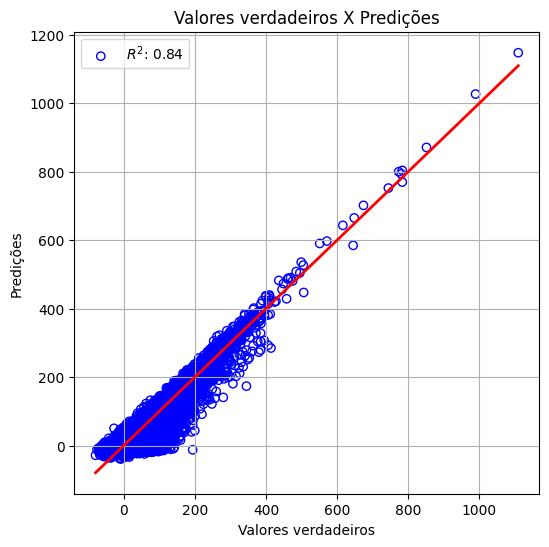

In [2]:
import matplotlib.pyplot as plt


# plot do R2
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="blue", label=r"$R^2$"+f": {r2:.2f}", facecolors="none", edgecolors="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Valores verdadeiros")
plt.ylabel("Predições")
plt.title("Valores verdadeiros X Predições")
plt.legend()
plt.grid()
plt.show()